In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from google.colab import drive
drive.mount('/content/drive')
filepath="/content/drive/MyDrive/Heart Disease.csv"
data_sheet=pd.read_csv(filepath)
data_sheet.info()
data_sheet.head(5)
data_sheet.isnull().sum()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   gender                            4240 non-null   object 
 1   age                               4240 non-null   int64  
 2   education                         4135 non-null   float64
 3   currentSmoker                     4240 non-null   int64  
 4   cigsPerDay                        4211 non-null   float64
 5   BPMeds                            4187 non-null   float64
 6   prevalentStroke                   4240 non-null   int64  
 7   prevalentHyp                      4240 non-null   int64  
 8   diabetes                          4240 non-null   int64  
 9   totChol                           4190 non-null   float64
 10  sys

,0
gender,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


In [ ]:

data_sheet

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart Disease (in next 10 years)
0,Male,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,Female,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,Female,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,Female,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,Male,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [ ]:
data_sheet.shape


(4240, 16)

In [ ]:
#separating
Features=data_sheet.drop("Heart Disease (in next 10 years)",axis=1)
Label=data_sheet["Heart Disease (in next 10 years)"]
numeric_cols=['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']
categorical_cols=['gender', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
Features_train, Features_test, Label_train, Label_test = train_test_split(Features, Label, test_size=0.25, random_state=20, stratify=Label)


In [ ]:
#imputing and encoding
num_impute=SimpleImputer(missing_values=np.nan, strategy='median')
col_impute=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
num_impute.fit(Features_train[numeric_cols])
NumFeatures_train_imputed=num_impute.transform(Features_train[numeric_cols])
NumFeatures_test_imputed=num_impute.transform(Features_test[numeric_cols])
col_impute.fit(Features_train[categorical_cols])
CatFeatures_train_imputed=col_impute.transform(Features_train[categorical_cols])
CatFeatures_test_imputed=col_impute.transform(Features_test[categorical_cols])
scaler=StandardScaler()
NumFeatures_train_scaled=scaler.fit_transform(NumFeatures_train_imputed)
NumFeatures_test_scaled=scaler.transform(NumFeatures_test_imputed)
encoder=OneHotEncoder(handle_unknown='ignore',sparse_output=False)
CatFeatures_train_encoded=encoder.fit_transform(CatFeatures_train_imputed)
CatFeatures_test_encoded=encoder.transform(CatFeatures_test_imputed)
Processed_features_train=np.hstack([NumFeatures_train_scaled,CatFeatures_train_encoded])
Processed_features_test=np.hstack([NumFeatures_test_scaled,CatFeatures_test_encoded])

In [ ]:
#model
model=LogisticRegression()
model.fit(Processed_features_train,Label_train)
label_predict=model.predict(Processed_features_test)
label_probability = model.predict_proba(Processed_features_test)[:, 1]
print( accuracy_score(Label_test, label_predict))

0.8594339622641509


Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       899
           1       0.83      0.09      0.17       161

    accuracy                           0.86      1060
   macro avg       0.85      0.54      0.55      1060
weighted avg       0.86      0.86      0.81      1060

AUC Score: 0.5449153303532566


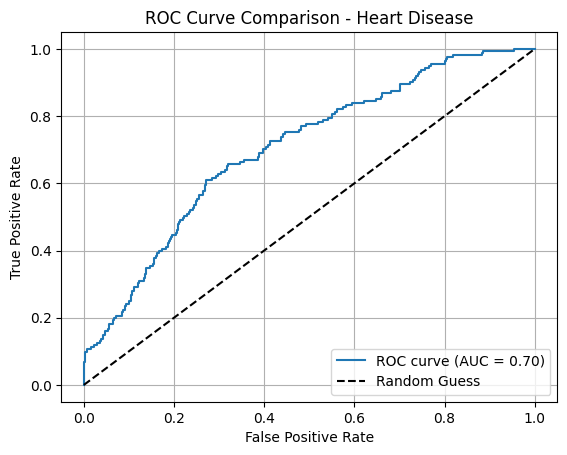

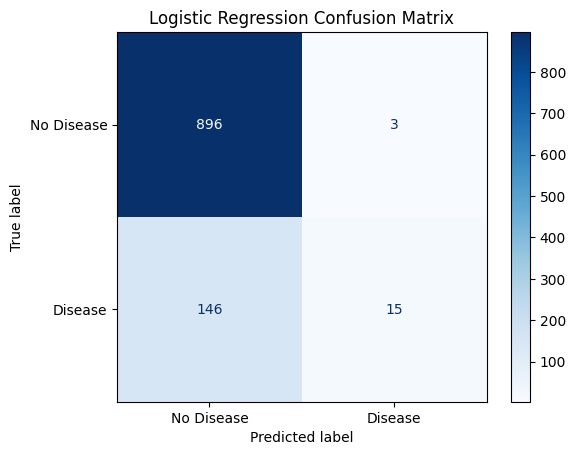

In [ ]:
from sklearn.metrics import (confusion_matrix, classification_report,  roc_auc_score, roc_curve, auc, ConfusionMatrixDisplay)
import seaborn as sns
print("Classification Report:")
print(classification_report(Label_test, label_predict))
print(f"AUC Score: {roc_auc_score(Label_test, label_predict)}")



# ROC Curve
fpr, tpr, _ = roc_curve(Label_test, label_probability)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')


plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison - Heart Disease")
plt.legend(loc="lower right")
plt.grid()
plt.show()

#confusion matrix
cm_log = confusion_matrix(Label_test, label_predict)
ConfusionMatrixDisplay(cm_log, display_labels=['No Disease', 'Disease']).plot(cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.show()